# Домашняя работа №3
# Студент: Правилов Михаил

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import *
import math

# Задание 1

Переобозначим точки по возрастанию ($x_s$ - пусть будет исходная точка $x_0$ из условия): $x_0 = x_s - h / \alpha, x_1 = x_s, x_2 = x_s + h * \alpha$

Мы хотим получить формулу для производной второго порядка, значит в формуле с лекции надо будет оставить два слагаемых: $p'(x) = [x_0, x_1]f + [x_0, x_1, x_2]f * (x - x_0 + x - x_1)$

$[x_0, x_1]f = \frac{f(x_1) - f(x_0)}{x_1 - x_0}$

$[x_0, x_1, x_2]f = \frac{[x_0, x_2]f - [x_0, x_1]f}{x_2 - x_1} = \frac{ \frac{f(x_2) - f(x_0)}{x_2 - x_0} - \frac{f(x_1) - f(x_0)}{x_1 - x_0} }{x_2 - x_1}$

Таким образом:

$f'(x_s) \approx p'(x_1) = \frac{f(x_1) - f(x_0)}{x_1 - x_0} + \frac{ \frac{f(x_2) - f(x_0)}{x_2 - x_0} - \frac{f(x_1) - f(x_0)}{x_1 - x_0} }{x_2 - x_1} * (x_1 - x_0) = \frac{y_1 - y_0}{h / \alpha} + \frac{ \frac{y_2 - y_0}{h / \alpha + \alpha * h} - \frac{y_1 - y_0}{h / \alpha} }{\alpha * h} * \frac{h}{\alpha} = \frac{y_1 - y_0}{h / \alpha} + \frac{y_2 - y_0}{\alpha * h + \alpha^3 * h} - \frac{y_1 - y_0}{\alpha * h} \Leftrightarrow $

$f'(x_s) \approx 1 / h * ( (y_1 - y_0) * (\alpha - \frac{1}{\alpha}) + \frac{(y_2 - y_0)}{\alpha^3 + \alpha} )$

Дальше, нас просят построить графики погрешностей в зависимости от h. Пусть $x_s = 0$, и построим графики для $\alpha = 1, 1.5, 2$. 

$f(x) = sin(x)$, $f'(x) = cos(x), h \in [10^{-8}, 1]$

In [67]:
def f(x):
    return np.sin(x)

def df(x):
    return np.cos(x)

def get_df_approx(alpha, h, x_s):
    x0 = x_s - h / alpha
    y0 = f(x0)
    x1 = x_s
    y1 = f(x1)
    x2 = x_s + h * alpha
    y2 = f(x2)
    def df_approx(x):
        return 1 / h * ( (y1 - y0) * (alpha - 1 / alpha) + (y2 - y0) / (alpha ** 3 + alpha) )
    return df_approx    

def draw_error(alpha, x_s):
    data_x = []
    data_y = []
    step = 0.001
    h_min = 10 ** (-8)
    h_max = 1
    h = h_min
    real_value = df(x_s)
    while h <= h_max:
        approx_value = get_df_approx(alpha, h, x_s)(x_s)
        data_x.append(h)
        data_y.append(abs(approx_value - real_value))
        h += step
    plt.subplot(211)
    plt.title("Error for x_s = " + str(x_s))
    plt.plot(data_x, data_y)
    plt.ylabel("|df_real(x_s) - df_approx(x_s)|")
    plt.xlabel("h")

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


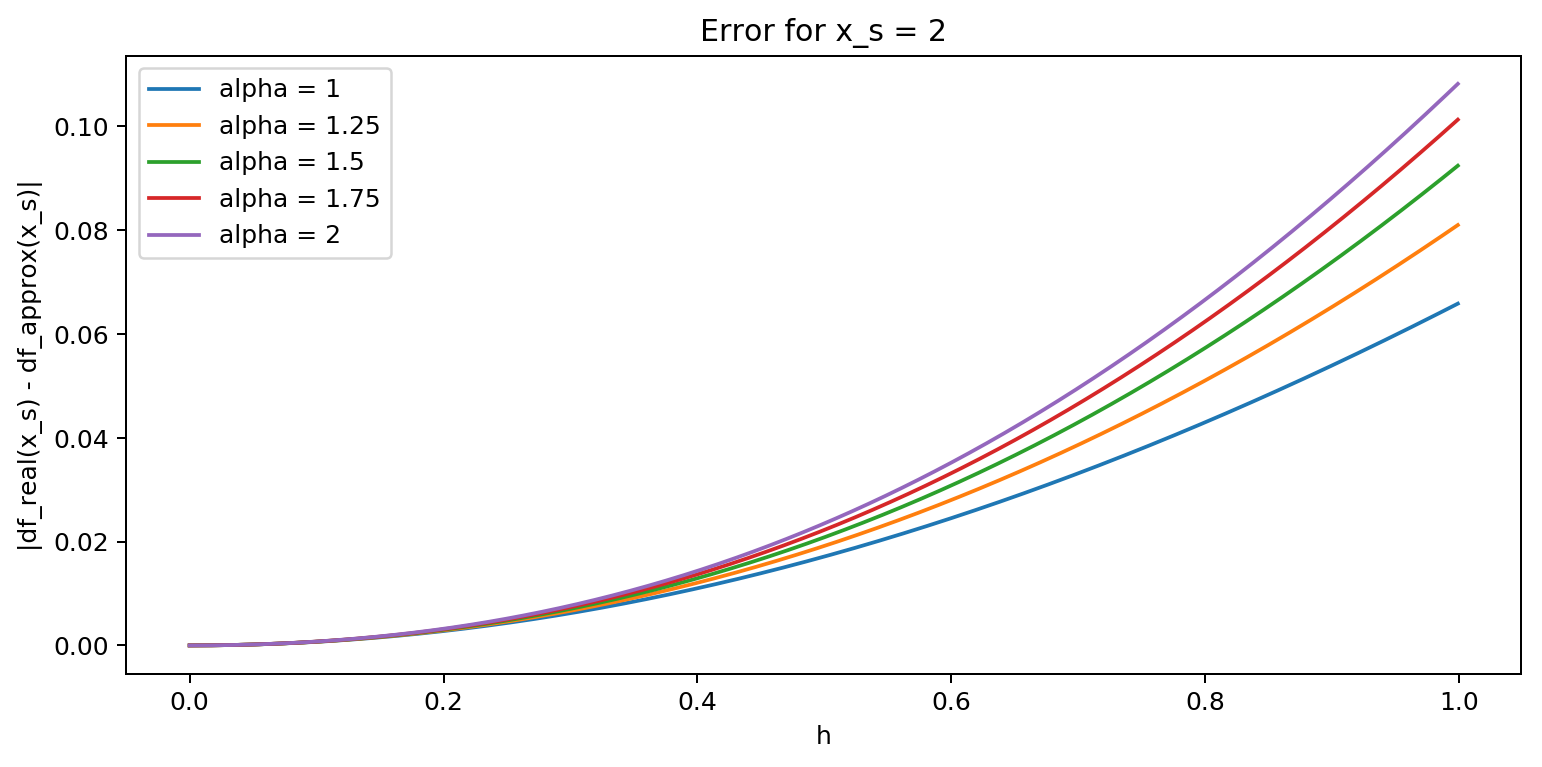

In [68]:
x_s = 2
alphas = [1, 1.25, 1.5, 1.75, 2]

plt.figure(figsize=(10, 10), dpi=180)
for alpha in alphas:
    draw_error(alpha, x_s)
plt.legend(list(map(lambda a: "alpha = " + str(a), alphas)))
plt.show()

Комментарии: видно, что около нуля все графики имеют маленькую погрешность, потому что у нас на лекции была оценка погрешности: $N = 2, n = 1: error \leq const * \frac{\|f^3\|_C}{2} * max_i |x_s - x_i|^2$

Так как $f(x) = sin(x)$, то $\|f^3\|_C = 1$

$max_i |x_s - x_i|^2$ это либо при $i = 0: x_s - (x_s - \frac{h}{\alpha}) = \frac{h}{\alpha}$, либо при $i = 2: x_s + \alpha * h - xs = \alpha * h$

Но $\frac{h}{\alpha} \leq \alpha * h \Leftrightarrow 1 \leq \alpha$

Поэтому $error \leq const * \alpha^2 * h^2$

Таким образом при $h$ близких к нулю, погрешность всегда очень мала (квадратичное убывание при убывании h).

При $x_s = 2$, видимо верхние оценки достигаются и графики действительно похожи на параболы и что еще важно заметить, что в случае $x_s = 2$ ошибка больше, чем больше альфа, что согласуется с выведеной выше оценкой.

# Задание 2

### Задание 2а

$\int_{-1}^{5}{\frac{1}{1 + 9x^2} dx} = 1 / 3 * arctg(3x) |_{-1}^{5} \approx 0.917757978$

Надо построить графики погрешностей в зависимости от числа интервалов для метода трапеций и Симпсона.

In [172]:
def g(x):
    return 1 / (1 + 9 * x ** 2)

def antiderivative(x):
    return 1 / 3 * np.arctan(3 * x)

a = -1
b = 5
length = b - a
real_value = antiderivative(b) - antiderivative(a)

In [302]:
def calculate_trapeziod(f, a, b, H):
    res = 0
    x_cur = a + H
    while x_cur < b:
        res += f(x_cur)
        x_cur += H
    res += f(a) / 2
    res += f(b) / 2
    res *= H
    return res

def trap(func, a, b, h):
    return h * (func(a) / 2 + sum([func(a + h * i) for i in range(1, int((b - a) / h))]) + func(b) / 2)

In [303]:
def calculate_Simpson(f, a, b, H):
    res = f(a) + f(b) + 4 * f(a + H / 2)
    x_cur = a + H
    while x_cur < b:
        res += 2 * f(x_cur) + 4 * f(x_cur + H / 2)
        x_cur += H
    res *= H / 6
    return res

def simp(func, a, b, h):
    return h / 6 * (func(a) + sum([4 * func(a + h / 2 * i) for i in range(1, 2 * int((b - a) / h), 2)]) + 
                   sum([2 * func(a + h / 2 * i) for i in range(2, 2 * int((b - a) / h), 2)]) + func(b))

In [312]:
def draw_error_integral(f, a, b, real_value, calculation_method, M_min, M_max):
    data_x = []
    data_y = []
    M_cur = M_min
    step = 1
    while M_cur <= M_max:
        H = (b - a) / M_cur
        approx = calculation_method(f, a, b, H)
        data_x.append(M_cur)
        data_y.append(np.log10(abs(approx - real_value)))
        M_cur += step
    plt.subplot(211)
    plt.plot(data_x, data_y)
    plt.ylabel("log10(|integral_real - approx_value|)")
    plt.xlabel("M (number of intervals)")

In [313]:
M_min = 1
M_max = 1000

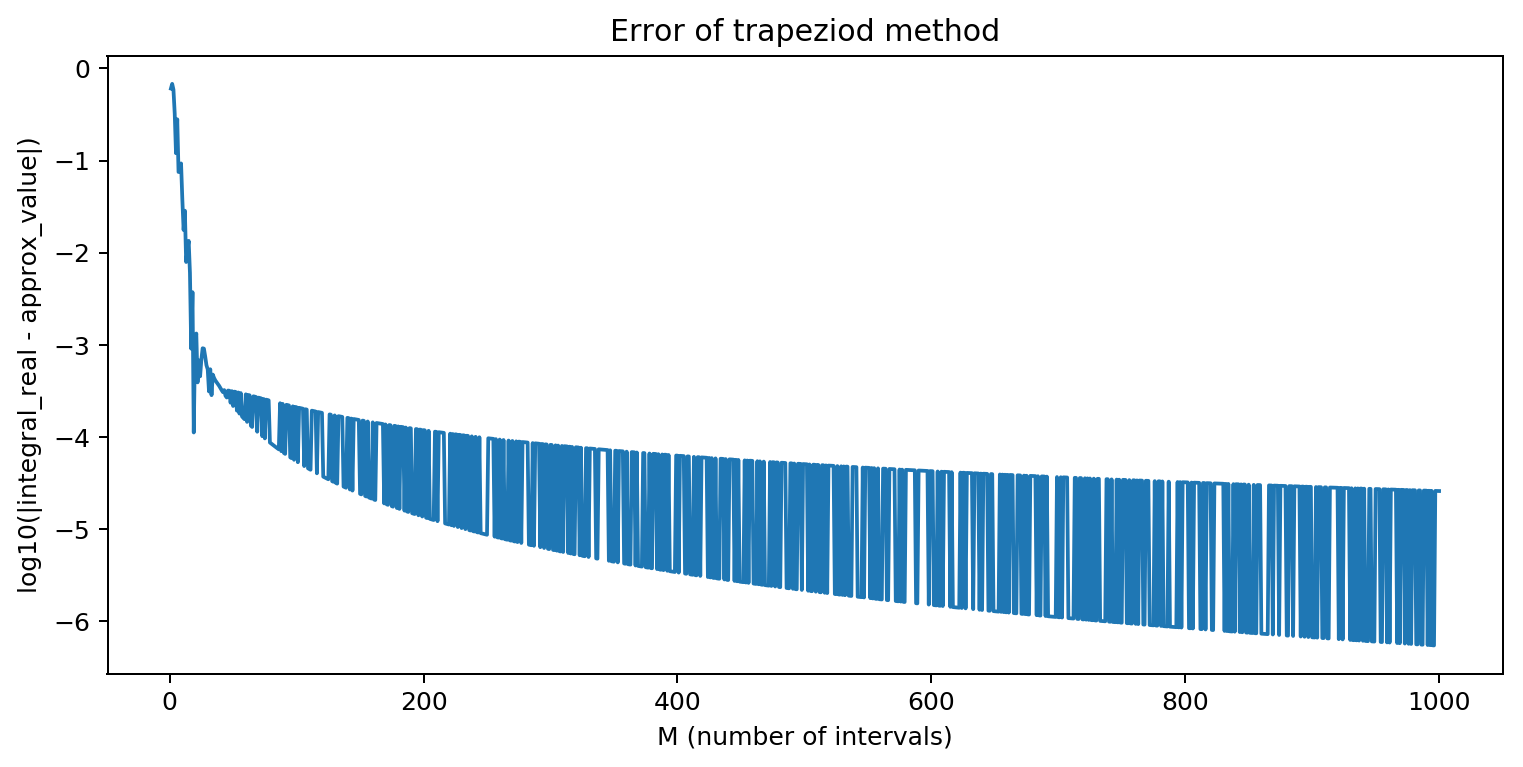

In [314]:
plt.figure(figsize=(10, 10), dpi=180)
draw_error_integral(g, a, b, real_value, calculate_trapeziod, M_min, M_max)
plt.title("Error of trapeziod method")
plt.show()

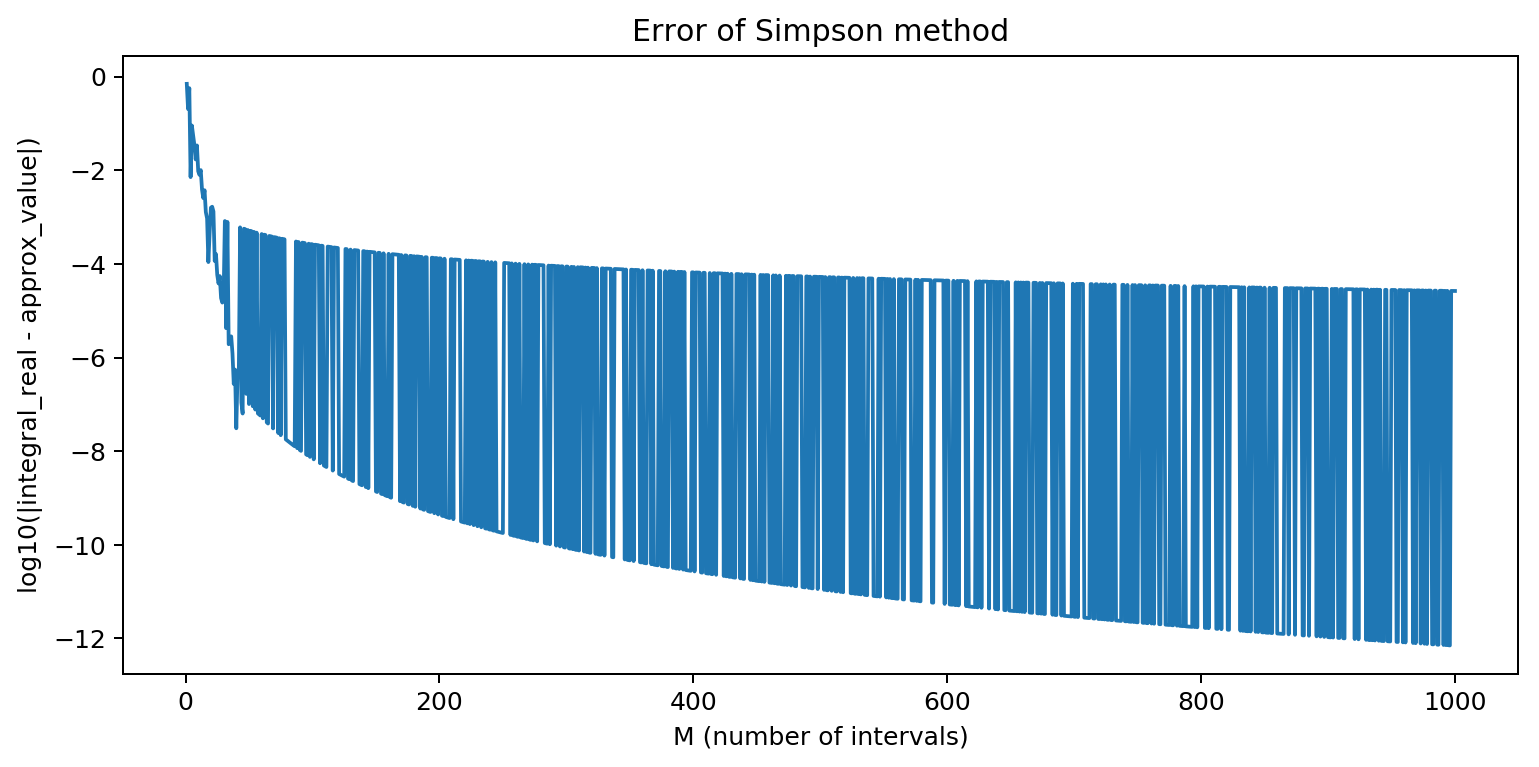

In [315]:
plt.figure(figsize=(10, 10), dpi=180)
draw_error_integral(g, a, b, real_value, calculate_Simpson, M_min, M_max)
plt.title("Error of Simpson method")
plt.show()

/home/mikhail/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


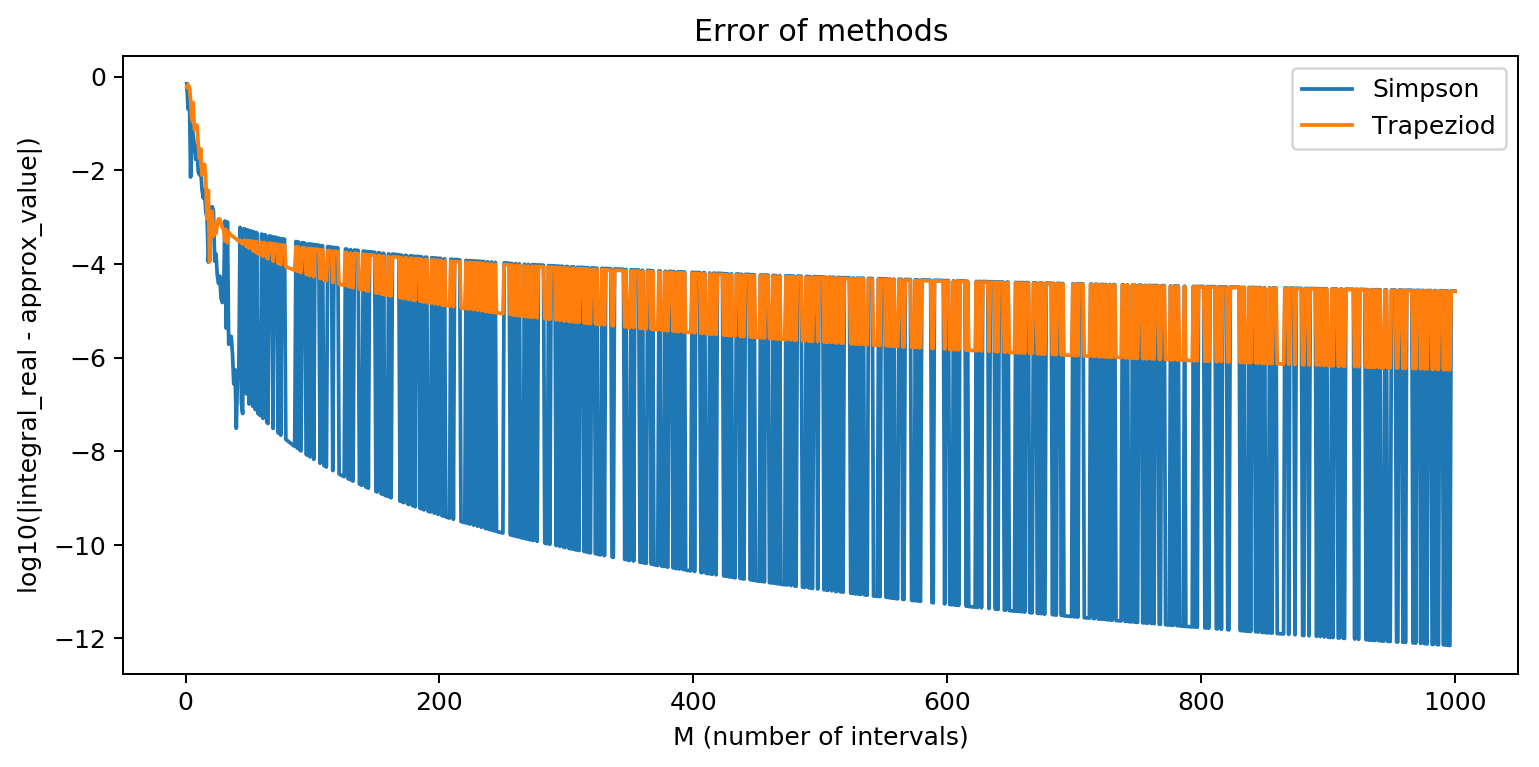

In [316]:
plt.figure(figsize=(10, 10), dpi=180)
draw_error_integral(g, a, b, real_value, calculate_Simpson, M_min, M_max)
draw_error_integral(g, a, b, real_value, calculate_trapeziod, M_min, M_max)
plt.title("Error of methods")
plt.legend(("Simpson", "Trapeziod"))
plt.show()

Эти графики в логарифмической шкале. Как и ожидалось ошибка Симпсона меньше, оно и неудивительно.

Также на паре мы доказывали следующие оценки:

для метода трапеции: $error \leq O(1 / M^2) => log(error) \leq const_1 * -2 * log(M)$ - что соответствует графику.

для метода Симпсона: $error \leq O(1 / M^4) => log(error) \leq const_2 * -4 * log(M)$ - что тоже соответствует графику и неудивительно, что Симпсон часто имеет значения ниже, он должен быть точнее.

Колебания обусловлены тем, что это лишь оценки сверху и необязательно должны достигаться. Также, поскольку Симпсон порой достигает такой же ошибки, что и метод трапеции, то это означает, что граница максимальной ошибки для метода трапеций не достигается, так как максимальная ошибка у Симпмона меньше, чем у метода трапеций.

### Задание 2b

Посчитать с помощью Рунге длину шага. Пусть $H_1 = 2 * H_2, H_2 = 10^{-3}, \epsilon = 10{-6}$

Тогда $H = \sqrt{\frac{\epsilon}{|C|}}$, где $C = \frac{1}{3 * H_2^{2}} * (S_{H_2} - S_{H_1})$ 

In [319]:
H2 = 10 ** (-3)
H1 = 2 * H2
eps = 10 ** (-6)
S_H2 = trap(g, a, b, H2)
S_H1 = trap(g, a, b, H1)
abs_C = abs(1 / (3 * H2 ** 2) * (S_H2 - S_H1))
H = np.sqrt(eps / abs_C)
print(H)

0.008125295008320198


In [320]:
H2 = 10 ** (-3)
H1 = 2 * H2
eps = 10 ** (-6)
S_H2 = calculate_trapeziod(g, a, b, H2)
S_H1 = calculate_trapeziod(g, a, b, H1)
abs_C = abs(1 / (3 * H2 ** 2) * (S_H2 - S_H1))
H = np.sqrt(eps / abs_C)
print(H)

0.0005837376748973546


In [337]:
def calculate_real_H(eps, f, a, b, real_value, calculation_method):
    error = 1000
    H = 1
    step = 0.1
    while error > eps and H > 0.1:
        H -= step
        print("H" + str(H))
        approx = calculation_method(f, a, b, H)
        error = abs(approx - real_value)
    return H

In [ ]:
print(calculate_real_H(eps, g, a, b, real_value, trap))

H0.9
H0.8
H0.7000000000000001
H0.6000000000000001
H0.5000000000000001
H0.40000000000000013
H0.30000000000000016
H0.20000000000000015
H0.10000000000000014
H1.3877787807814457e-16
